# Procrastinate Pro+
Расследование  

Почему компания терпит убытки

# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+.  
Несмотря на огромные вложения в рекламу, последние несколько месяцев **компания терпит убытки**.  

### Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.  

### Вам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.


## План работы  
Шаг 1. Загрузите данные и подготовьте их к анализу
* Положите данные о визитах, заказах и рекламных тратах в переменные.
* Подготовьте данные к анализу. Убедитесь, что тип данных во всех колонках соответствует значениям. Проверьте отсутствие дубликатов.  
Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии  
  
  
Шаг 3. Проведите исследовательский анализ данных  
* Создайте пользовательские профили. Определите минимальную и максимальную даты привлечения пользователей.
* Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
* Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
* Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.  
Шаг 4. Маркетинг
* Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.
* Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей.
Шаг 5. Оцените окупаемость рекламы  
Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.
* Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.  
Ответьте на такие вопросы:
* Окупается ли реклама в целом?
* Какие устройства, страны и каналы могут снижать окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?
* * Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.  
Шаг 6. Напишите выводы
* Выделите причины неэффективности привлечения пользователей.
* Сформулируйте рекомендации для отдела маркетинга.


In [2]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# importing a library for operating with a data type "NaN"
import numpy as np
import datetime
from datetime import datetime, timedelta

In [3]:
# отключаем некритичные уведомления
import warnings
warnings.filterwarnings('ignore')
# показывать до 40ка колонок
pd.set_option('display.max.columns', 40)
# установка формата вывода на дисплей численных значений
pd.options.display.float_format = '{:,.2f}'.format
# Библиотека для отображения картинок
from IPython.display import Image 
# бибилиотека для укоругления в бОльшую сторону
import math

In [4]:
# считываем данные
try:
    # Yandex path
    visits = pd.read_csv('/datas...ort.csv')
    orders = pd.read_csv('/datas...ort.csv')
    costs =  pd.read_csv('/datas...rt.csv')
    
    
except:
    # local patch
    visits = pd.read_csv(r"C:\Users\eddyd...ort.csv")
    orders = pd.read_csv(r"C:\Users\eddyd...ort.csv")
    costs =  pd.read_csv(r"C:\Users\eddyd...ort.csv")

In [5]:
# сведения о данных
def full_info(dataframe):
    print(dataframe.columns)
    display(dataframe.head(3))
    display(dataframe.info())
    print("describe")
    display(dataframe.describe())
    print("Доли отсутствующих значений")
    print(round(dataframe.isna().sum() * 100 / len(dataframe), 2))
    return

## Предобработка данных

### visits

In [6]:
full_info(visits)

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

describe


,User Id
count,"309,901.00"
mean,"499,766,449,382.69"
std,"288,789,916,887.83"
min,"599,326.00"
25%,"249,369,122,776.00"
50%,"498,990,589,687.00"
75%,"749,521,111,616.00"
max,"999,999,563,947.00"


Доли отсутствующих значений
User Id         0.00
Region          0.00
Device          0.00
Channel         0.00
Session Start   0.00
Session End     0.00
dtype: float64


#### пропусков данных нет

#### Названия колонок приведём к змеиному формату

In [7]:
# всё - нижним регистром
visits.columns = visits.columns.str.lower()
visits.columns

Index(['user id', 'region', 'device', 'channel', 'session start',
       'session end'],
      dtype='object')

In [8]:
# заменим пробелы символами подчеркивания
visits.columns = [_name.replace(' ', '_') for _name in visits.columns]
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

#### user_id
посмотрим, сколько уникальных значений

In [9]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
214203066007     1
369265191867     1
346271445800     1
133742530598     1
279181973476     1
Name: user_id, Length: 150008, dtype: int64

В колонке **user_id** есть записи с одной строкой на значение user_id  
и есть с несколькими строками на значение user_id  
**150000** уникальных пользователей

#### region
посмотрим, сколько уникальных значений  
нет ли неявных дубликатов

In [10]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

В **region** встречается **4** уникальных значения.  

Лидер упоминаемости - **United States**

#### device
посмотрим, сколько уникальных значений  
нет ли неявных дубликатов

In [11]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

В **device** встречается **4** уникальных значения.  

Лидер упоминаемости - **iPhone**

#### channel
посмотрим, сколько уникальных значений  
нет ли неявных дубликатов

In [12]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

В **channel** встречается **11** уникальных значения.  

Лидер упоминаемости - **organic**  
  
  А среди платных каналдов - **TipTop** и **FaceBoom**

#### session start и session_end
переведём в формат даты

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

минимальные и максимальные значения (временной интервал)

In [14]:
print("Минимальное значение session_start", min(visits['session_start']))
print("Минимальное значение session_end", min(visits['session_end']))
print()
print("Максимальное значение session_start", max(visits['session_start']))
print("Максимальное значение session_end", max(visits['session_end']))


Минимальное значение session_start 2019-05-01 00:00:41
Минимальное значение session_end 2019-05-01 00:07:06

Максимальное значение session_start 2019-10-31 23:59:23
Максимальное значение session_end 2019-11-01 01:38:46


### orders

In [15]:
full_info(orders)

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

describe


,User Id,Revenue
count,"40,212.00","40,212.00"
mean,"499,029,531,203.23",5.37
std,"286,093,675,967.16",3.45
min,"599,326.00",4.99
25%,"251,132,440,436.75",4.99
50%,"498,283,972,665.00",4.99
75%,"743,332,711,780.00",4.99
max,"999,895,427,370.00",49.99


Доли отсутствующих значений
User Id    0.00
Event Dt   0.00
Revenue    0.00
dtype: float64


#### Пропусков данных нет

#### Названия колонок приведём к змеиному формату

In [16]:
# всё - нижним регистром
orders.columns = orders.columns.str.lower()
orders.columns

Index(['user id', 'event dt', 'revenue'], dtype='object')

In [17]:
# заменим пробелы символами подчеркивания
orders.columns = [_name.replace(' ', '_') for _name in orders.columns]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

#### user_id
посмотрим, сколько уникальных значений

In [18]:
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
829252887757     1
499471996783     1
847348136580     1
390188868722     1
168548862926     1
Name: user_id, Length: 8881, dtype: int64

В колонке user_id есть записи с одной строкой на значение user_id  
и есть с несколькими строками на значение user_id  
8881 уникальных пользователей  
  
  **интересно**, это количество значительно меньше, чем в данных о визитах

#### event_dt
переведём в формат даты  
посмотрим мин и макс значения

In [19]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
print("Минимальное значение event_dt", min(orders['event_dt']))
print("Максимальное значение event_dt", max(orders['event_dt']))

Минимальное значение event_dt 2019-05-01 00:28:11
Максимальное значение event_dt 2019-10-31 23:56:56


Интервал времени **совпадает** с данными в табл о визитах

#### revenue

In [20]:
print("Минимальное значение revenue", min(orders['revenue']))
print("Среднее значение revenue", orders['revenue'].mean())
print("Медиана значение revenue", orders['revenue'].median())
print("Максимальное значение revenue", max(orders['revenue']))

Минимальное значение revenue 4.99
Среднее значение revenue 5.370607778770249
Медиана значение revenue 4.99
Максимальное значение revenue 49.99


Распределение и ящик с усами

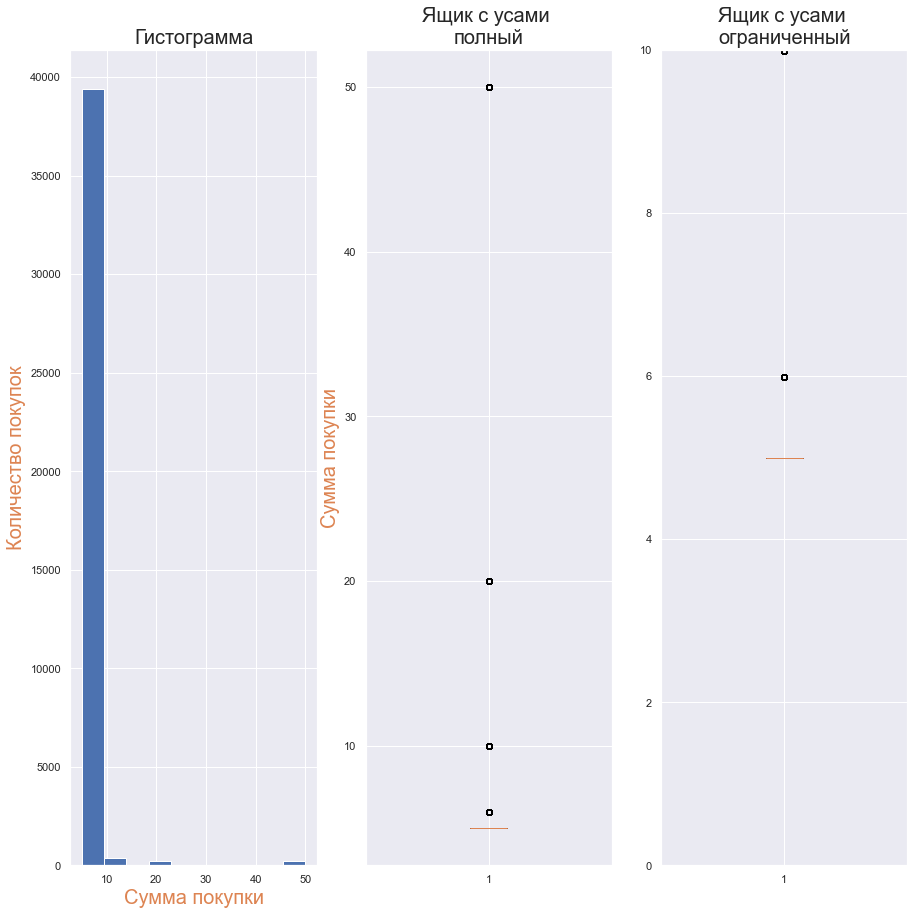

In [21]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,15)})
fig=plt.figure()
 
ax=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# plot line graph
ax.hist(orders['revenue'])
ax.set_ylabel("Количество покупок", color="C1",  fontsize=20)
ax.set_xlabel("Сумма покупки", color="C1",  fontsize=20)
ax.set_title("Гистограмма",  fontsize=20)
 
# plot box
ax2.boxplot(orders['revenue'])
ax2.set_ylabel("Сумма покупки", color="C1",  fontsize=20)
ax2.set_title("Ящик с усами \nполный",  fontsize=20)

# plot box 2
ax3.boxplot(orders['revenue'])
ax3.set_ylabel("", color="C1",  fontsize=20)
ax3.set_title("Ящик с усами \nограниченный",  fontsize=20)
ax3.set_ylim(0, 10.0)
 
plt.show()

Подавляющее число продаж - минимальный пакет за базовую стоимость 4,99

#####  Посмотрим, какие покупки по цене встречаются

In [22]:
orders['revenue'].unique()


array([ 4.99,  5.99,  9.99, 49.99, 19.99])

<div class="alert alert-info"> 
<b>Подписки:</b> 
* 4,99
* 5,99
* 9,99
* 19,99
* 49,99

</div>



### costs

In [23]:
full_info(costs)

Index(['dt', 'Channel', 'costs'], dtype='object')


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

describe


,costs
count,"1,800.00"
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


Доли отсутствующих значений
dt        0.00
Channel   0.00
costs     0.00
dtype: float64


Пропусков данных **нет**

#### Названия колонок приведём к змеиному формату

In [24]:
# всё - нижним регистром
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

#### dt
переведём в формат даты  
* название месяца
*  в коротком формате  

  
посмотрим мин и макс значения

In [25]:
# выделяем месяц
costs['month'] = pd.to_datetime(costs['dt']).dt.strftime('%b')
# выделяем дату
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
print("Минимальное значение event_dt", min(costs['dt']))
print("Максимальное значение event_dt", max(costs['dt']))

Минимальное значение event_dt 2019-05-01
Максимальное значение event_dt 2019-10-27


Интервал времени совпадает с другими таблицами  
Добавим колонку с названием месяца

#### channel
Посмотрим уникальные значения и количества записей с ними

In [26]:
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

**10** значений - все каналы за исключением органического  
Количество записей одинаковое - **180** для каждого  
Значит, во все каналы вкладывались равномерно

#### costs

In [27]:
print("Минимальное значение costs", min(costs['costs']))
print("Среднее значение costs", costs['costs'].mean())
print("Медиана значение costs", costs['costs'].median())
print("Максимальное значение costs", max(costs['costs']))

Минимальное значение costs 0.8
Среднее значение costs 58.60961111111118
Медиана значение costs 12.285000000000002
Максимальное значение costs 630.0


Распределение и ящик с усами

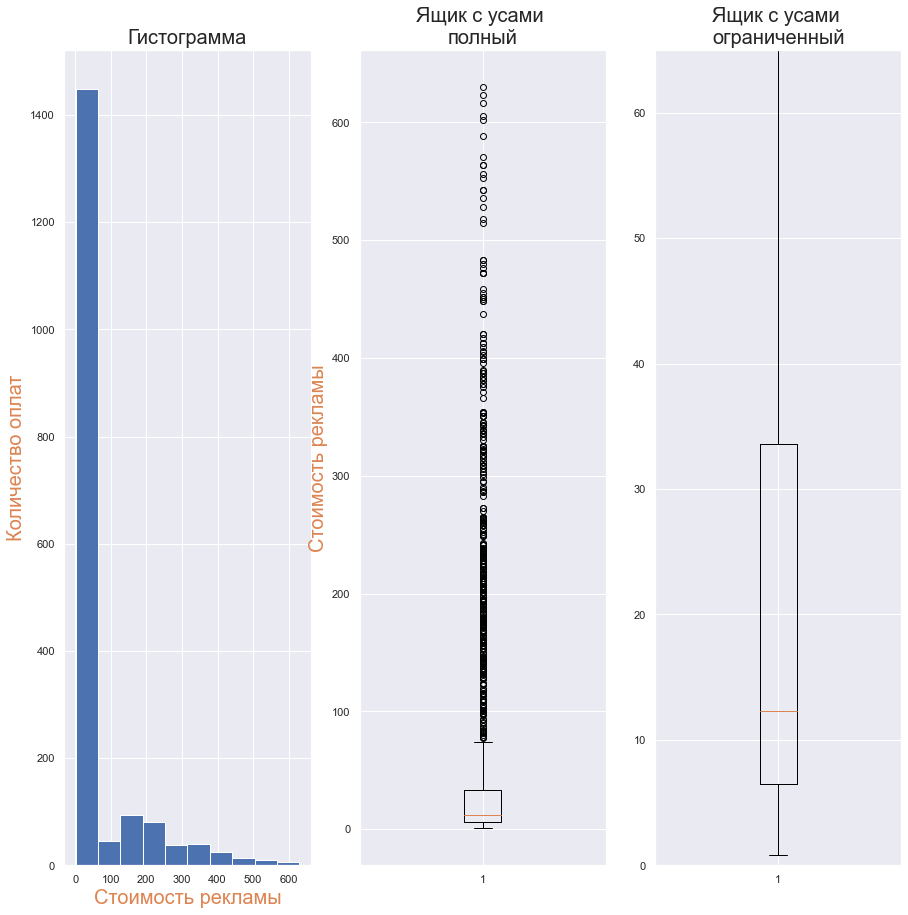

In [28]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,15)})
fig=plt.figure()
 
ax=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# plot line graph
ax.hist(costs['costs'])
ax.set_ylabel("Количество оплат", color="C1",  fontsize=20)
ax.set_xlabel("Стоимость рекламы", color="C1",  fontsize=20)
ax.set_title("Гистограмма",  fontsize=20)
 
# plot box
ax2.boxplot(costs['costs'])
ax2.set_ylabel("Стоимость рекламы", color="C1",  fontsize=20)
ax2.set_title("Ящик с усами \nполный",  fontsize=20)

# plot box 2
ax3.boxplot(costs['costs'])
ax3.set_ylabel("", color="C1",  fontsize=20)
ax3.set_title("Ящик с усами \nограниченный",  fontsize=20)
ax3.set_ylim(0, 65.0)
 
plt.show()

Интересная картина.  
Основная масса платежей за рекламные каналы в интервале от 7 до 35 единиц.  

Приэтом наблюдается достаточно мощный горб гистограммы в области 150 - 250 единиц за канал.  
В дальнейшем можно будет внимателнее рассматривать эту историю, при необходимости.

### Вывод по Предобработка данных

Данные поступили в хорошем состоянии.  
Названия колонок приведены к змеиному формату.  
Данные без пропусков и дубликатов.  
Также отсутствуют неявные дубликаты.  
Количества каналов и временные интервалы по всем таблицам коррелируют друг с другом (то есть совпадают).  
Проблем не выявлено.  


#### Структура данных

##### visits
* user_id - идентификатор пользователя, целочисленное
* region - регион, в котором находится пользователь, строковое
* device - тип устройства, строковое
* channel - канал привлечения, строковое
* session start - тайм-код начала сессии, полная дата
* session_end - тайм-код окончания сессии, полная дата

##### orders
* user_id - идентификатор пользователя, целочисленное
* event_dt - тайм-код покупки, полная дата
* revenue - сумма покупки, численное

##### costs
* dt - дата оплаты рекламного канала, дата без времени
* channel - рекламный канал, строковое
* costs - сумма оплаты, численное


####  Основные особенности на предварительном анализе:  
    * 150000 уникальных пользователей  
    * United States - лидер упоминаемости  
    * iPhone - лидер упоминаемости  
    * 10 платных каналов трафика  
    * **TipTop** и **FaceBoom** - лидеры по упоминаемости  
    * интервалы времени с мая 2019 по ноябрь 2019  
    * покупателей лишь 8881 из 150000 визитёров  
    * Подавляющее число продаж - минимальный пакет за базовую стоимость 4,99  
    * Основная масса платежей за рекламные каналы в интервале от 7 до 35 единиц.

    * * Приэтом наблюдается достаточно мощный горб гистограммы в области 150 - 250 единиц за канал.

## Функции для расчётов
для расчета и анализа LTV, ROI, удержания и конверсии

### LTV и ROI
get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
)  
  
   return (  
           result_raw,  # сырые данные   
                   result_grouped,  # таблица LTV  
                           result_in_time,  # таблица динамики LTV  
                                   roi_grouped,  # таблица ROI  
                                           roi_in_time,  # таблица динамики ROI  
                                               )

In [29]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


### удержания
get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
)  
  
  return result_raw, result_grouped, result_in_time

In [30]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### конверсии
get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
)  
  
  return result_raw, result_grouped, result_in_time

In [31]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Служебные функции
* get_profiles(sessions, orders, events, ad_costs, event_names=[])  

return profiles

In [32]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Графические функции  
* filter_data(df, window)  
* * return df  
* plot_retention(retention, retention_history, horizon, window=7)  
* plot_conversion(conversion, conversion_history, horizon, window=7)  
* plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

In [33]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


In [34]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


In [35]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [36]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


## Исследовательский анализ данных

### Пользовательские профили. 
Минимальную и максимальную даты привлечения пользователей

Вызовем функцию get_profiles(), передав ей данные о посещениях, покупках, и тратах на рекламу.  
Укажем, что данных о событиях у нас нет.

In [37]:
events = None
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


#### Минимальные и максимальные даты

In [38]:
print(min(profiles['first_ts'].dt.date), "- минимальная дата первой сессии пользователей")
print(max(profiles['first_ts'].dt.date) , "- максимальная дата первой сессии пользователей")

2019-05-01 - минимальная дата первой сессии пользователей
2019-10-27 - максимальная дата первой сессии пользователей


#### Выясним, из каких стран пользователи приходят в приложение

In [39]:
profiles[['region','user_id']].groupby(by='region').count().sort_values(by='user_id', ascending=False)

,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


#### На какую страну приходится больше всего платящих пользователей

In [76]:
profiles[['region','payer']][profiles['payer'] == True]\
    .groupby(by='region').count().sort_values(by='payer', ascending=False)

,payer
region,
United States,6902
UK,700
France,663
Germany,616


Рейтинги общего количества пользователей и количества платящих пользователей по странам **совпадают**

#### Доля платящих пользователей по странам

In [77]:
# all users
all_users = profiles[['region','user_id']].groupby(by='region').count().sort_values(by='user_id', ascending=False)
# payers
payers = profiles[['region','payer']][profiles['payer'] == True]\
    .groupby(by='region').count().sort_values(by='payer', ascending=False)
# объеденим две таблицы
percentage_of_buyers = all_users.merge(payers, on='region')
# добавим колонку долей
percentage_of_buyers['percentage'] = (percentage_of_buyers['payer'] / percentage_of_buyers['user_id']) * 100
display(percentage_of_buyers)

,user_id,payer,percentage
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


**United States** - безусловный лидер.  
И по количеству пользователей, и доле платящих из них.  
  
**Germany** занимет последнее место по количеству пользователей, но на **втором** месте по доле плятящих.  
**хорошая точка роста бизнеса**

#### Какими устройствами пользуются клиенты 
какие устройства предпочитают платящие пользователи  
  
Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства


In [78]:
# all devices
all_users_d = profiles[['device','user_id']].groupby(by='device').count().sort_values(by='user_id', ascending=False)
# payers
devices = profiles[['device','payer']][profiles['payer'] == True]\
    .groupby(by='device').count().sort_values(by='payer', ascending=False)
# объеденим две таблицы
percentage_of_devices = all_users_d.merge(devices, on='device')
# добавим колонку долей
percentage_of_devices['percentage'] = (percentage_of_devices['payer'] / percentage_of_devices['user_id']) * 100
display(percentage_of_devices)

,user_id,payer,percentage
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


Пользователи **iPhone** и **Mac** подтверждают устоявшееся мнение о них )))


#### Рекламные источники привлечения
*  каналы, из которых пришло больше всего платящих пользователей
* таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения

In [79]:
# channels
all_users_ch = profiles[['channel','user_id']].groupby(by='channel').count().sort_values(by='user_id', ascending=False)
# payers
channels = profiles[['channel','payer']][profiles['payer'] == True]\
    .groupby(by='channel').count().sort_values(by='payer', ascending=False)
# объеденим две таблицы
percentage_of_channels = all_users_ch.merge(channels, on='channel')
# добавим колонку долей
percentage_of_channels['percentage'] = (percentage_of_channels['payer'] / percentage_of_channels['user_id']) * 100
display(percentage_of_channels.sort_values('payer', ascending=False))

,user_id,payer,percentage
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


**FaceBoom** - рекорсмен конверсии (12,20%). Это позволило каналу FaceBoom опередить органический канал по количеству платящих пользователей.  
**Перспективные** каналы для инвестиций - **AdNonSense** и **lambdaMediaAds**. Эти каналы характеризуются высоким коэффициентов конверсии.

#### Выводы по исследованию профилей пользователей
* 2019-05-01 - минимальная дата первой сессии пользователей
* 2019-10-27 - максимальная дата первой сессии пользователей  
  
* United States	- страна-лидер по количеству и качеству пользователей  
  
* Germany занимет последнее место по количеству пользователей, но на втором месте по доле платящих.
**хорошая точка роста бизнеса**  
  
* Пользователи **iPhone и Mac** лидируют  
  
* **FaceBoom** - рекордсмен конверсии (12,20%). Это позволило каналу FaceBoom опередить органический канал по количеству платящих пользователей.
* Перспективные каналы для инвестиций - **AdNonSense** и **lambdaMediaAds**. Эти каналы характеризуются высоким коэффициентов конверсии.

### Маркетинг

#### Общая сумма расходов на маркетинг.
Выясним, как траты распределены по источникам.

Таблица **costs**

#### Всего расходов на рекламу

In [44]:
print(int(costs['costs'].sum()), "общая сумма расходов на рекламу")

105497 общая сумма расходов на рекламу


#### Расходы на рекламу по каналам

In [45]:
costs[['channel','costs']].groupby(by='channel').sum().sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,"54,751.30"
FaceBoom,"32,445.60"
WahooNetBanner,"5,151.00"
AdNonSense,"3,911.25"
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
LeapBob,"1,797.60"
lambdaMediaAds,"1,557.60"
MediaTornado,954.48


Рекламный бизнес в плену ожиотажных тенденций.  
Самые большие вливания в новомодный канал **TipTop**

#### Изменение затрат на рекламу в течении времени

In [46]:
costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum').head()


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.95,113.30,2.52,6.24,4.25,21.06,80.00,10.80,8.10,17.60
2019-05-02,34.65,78.10,2.94,5.04,4.25,16.97,55.00,7.20,9.90,16.80
2019-05-03,47.25,85.80,2.73,6.96,5.75,16.38,64.00,8.40,9.00,16.80
2019-05-04,51.45,136.40,3.99,9.36,4.25,17.55,70.00,10.80,15.60,17.60
2019-05-05,36.75,122.10,4.62,11.04,5.50,27.50,78.00,12.00,9.60,12.80


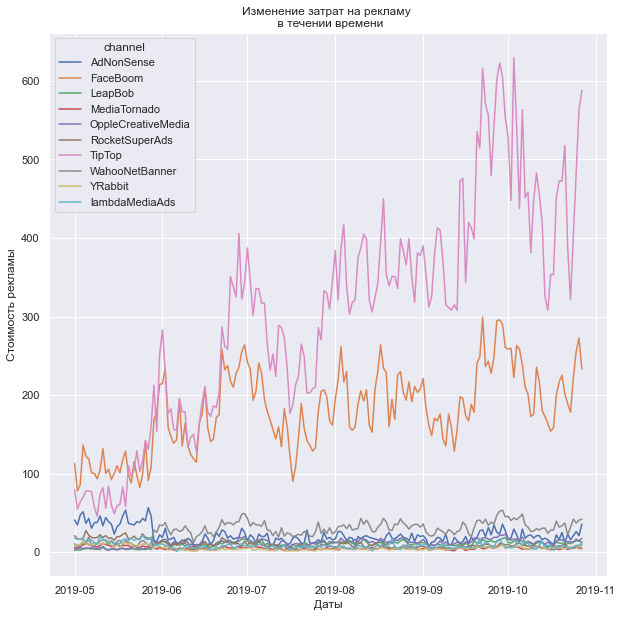

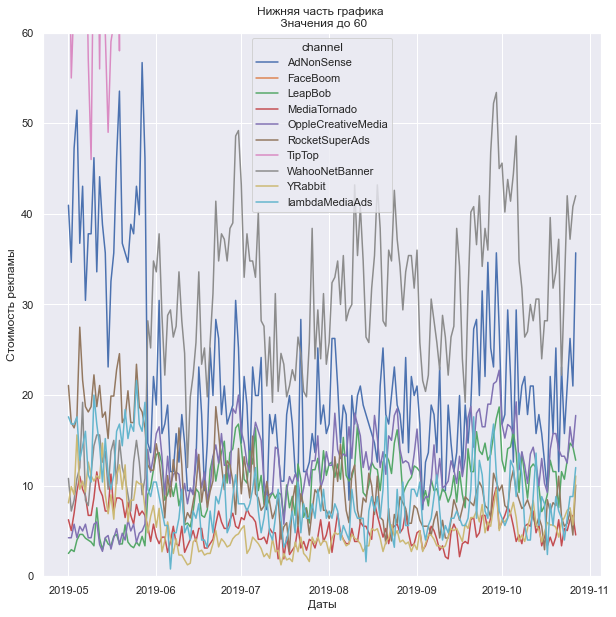

In [47]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# полноформатный график
ax = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum').plot();
ax.set_ylabel("Стоимость рекламы");
ax.set_xlabel("Даты");
ax.set_title("Изменение затрат на рекламу \n в течении времени");
# график усечённый по оси Y
ax2 = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum').plot();
ax2.set_ylim(0, 60)
ax2.set_ylabel("Стоимость рекламы");
ax2.set_xlabel("Даты");
ax2.set_title("Нижняя часть графика \n Значения до 60");

plt.show()

По графикам видим:
Вливания в каналы - лидеры по оплатам **TipTop и FaceBoom** идут по **нарастющей** в течении года.  

Канал **AdNonSense** начали достаточно активно, но потом значительно снизили.
Опраданно ли это?...

#### Сколько в среднем стоило привлечение одного пользователя из каждого источника
* средний CAC на одного пользователя для всего проекта
* средний CAC на одного пользователя для каждого источника трафика

Группируем данные по источникам.  
Суммируем суммы платежей.  
Суммируем количество пользователей.  
Делим платежи на пользователей.

In [48]:
# пользователи и каналы 
users_and_channels = profiles[['channel', 'user_id']].groupby(by='channel').count()
users_and_channels

,user_id
channel,
AdNonSense,3880
FaceBoom,29144
LeapBob,8553
MediaTornado,4364
OppleCreativeMedia,8605
RocketSuperAds,4448
TipTop,19561
WahooNetBanner,8553
YRabbit,4312


In [49]:
# каналы и оплаты
channels_and_costs = costs[['channel', 'costs']].groupby(by='channel').sum()
channels_and_costs

,costs
channel,
AdNonSense,"3,911.25"
FaceBoom,"32,445.60"
LeapBob,"1,797.60"
MediaTornado,954.48
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
TipTop,"54,751.30"
WahooNetBanner,"5,151.00"
YRabbit,944.22


In [50]:
# объеденим результаты
# только по платным каналам
cac_by_channels =  channels_and_costs.merge(users_and_channels, on='channel')
cac_by_channels

,costs,user_id
channel,,
AdNonSense,"3,911.25",3880
FaceBoom,"32,445.60",29144
LeapBob,"1,797.60",8553
MediaTornado,954.48,4364
OppleCreativeMedia,"2,151.25",8605
RocketSuperAds,"1,833.00",4448
TipTop,"54,751.30",19561
WahooNetBanner,"5,151.00",8553
YRabbit,944.22,4312


##### Средний САС в целом

In [51]:
print("Стоимость привлечения одного пользователя в целом по проекту:")
print()
print((sum(costs['costs']) / len(visits['user_id'].value_counts())) , "по всему проекту, включая органический трафик")
print()
print((sum(cac_by_channels['costs']) / sum(cac_by_channels['user_id'])) , "за вычетом пользователей органического трафика")

Стоимость привлечения одного пользователя в целом по проекту:

0.7032778251826577 по всему проекту, включая органический трафик

1.127481323942759 за вычетом пользователей органического трафика


##### Средний САС по каналам

In [52]:
# вычисляем CAC и сортируем по нему
cac_by_channels['cac'] = cac_by_channels['costs'] / cac_by_channels['user_id']
display(cac_by_channels.sort_values(by='cac', ascending=False))

,costs,user_id,cac
channel,,,
TipTop,"54,751.30",19561,2.80
FaceBoom,"32,445.60",29144,1.11
AdNonSense,"3,911.25",3880,1.01
lambdaMediaAds,"1,557.60",2149,0.72
WahooNetBanner,"5,151.00",8553,0.60
RocketSuperAds,"1,833.00",4448,0.41
OppleCreativeMedia,"2,151.25",8605,0.25
YRabbit,944.22,4312,0.22
MediaTornado,954.48,4364,0.22


Самые дорогие привлечённые пользователи из **TipTop**  
  
Вдвое дешевле из **FaceBoom** и **AdNonSense**  
  
В группе дешевых каналов **4** участника:
* OppleCreativeMedia
* YRabbit
* MediaTornado
* LeapBob

##### Графически соотношение САС и вливаний в каналы

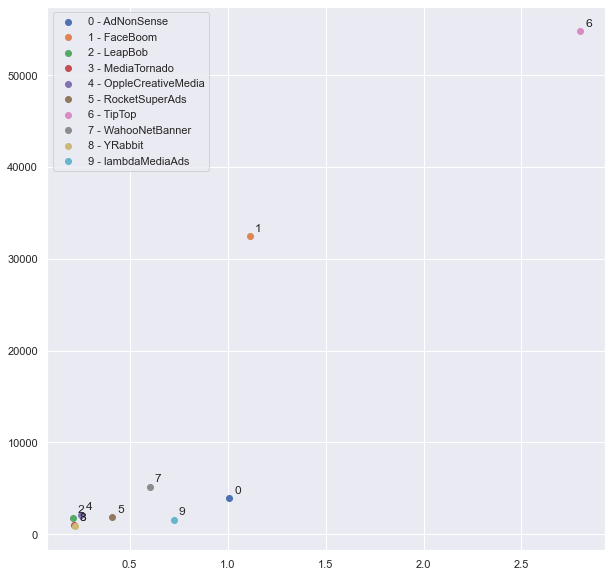

In [80]:
# Код ревьюера:
fig, ax = plt.subplots()

for i, txt in enumerate(cac_by_channels.index.values):
    legend = (str(i) + ' - ' + str(cac_by_channels.reset_index()['channel'][i]))    
    ax.annotate(i, (cac_by_channels['cac'][i], cac_by_channels['costs'][i]),
                xytext=(5,5), textcoords='offset points')
    plt.scatter(cac_by_channels['cac'][i], cac_by_channels['costs'][i], label = legend)
    
plt.grid(True)  
plt.legend(loc="upper left")

plt.show()

Здесь видно, что в каналы с **низкой** стоимостью привлечения, **мало** денежных вливаний.  
  
А в каналы с **большой** стоимостью привлечения пользователя - самые большие денежные транши.  
  
#### **Может быть, надо сделать наоборот?**

##### Динамика изменения САС для каждого источника во времени

Группируем профили пользователей по-месячно  
(за вычетом органического трафика)

Группируем оплаты рекламы по-месячно

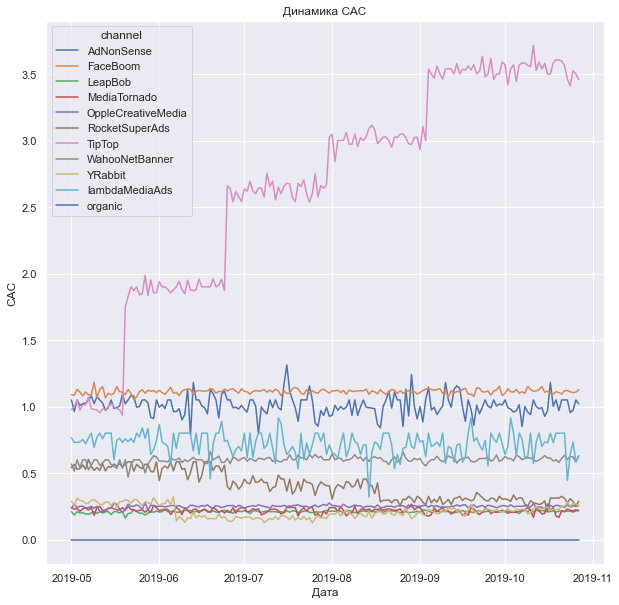

In [57]:
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True)
plt.ylabel('CAC')
plt.xlabel('Дата')
plt.title('Динамика САС')
plt.show()

### Окупаемость рекламы

Сегодня - 01.11.2019 г.  
Срок окупаемости - ДВЕ недели.  

Сделаем ДВА анализа:
* с органикой
* без органики

#### Установим момент и горизонт анализа данных.

In [60]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Используя графики LTV, ROI и CAC

#### Считаем бизнес-показатели
Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

##### Включая органический трафик

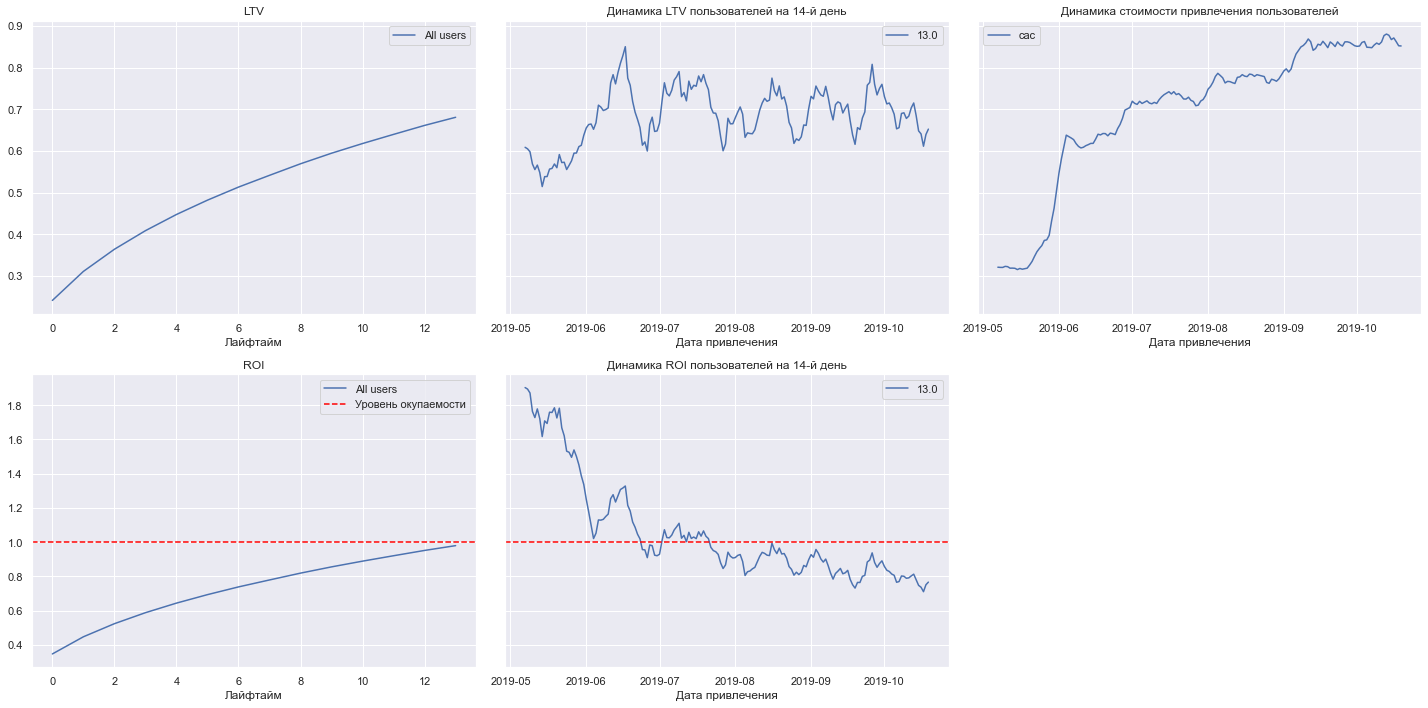

In [61]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

##### Исключая органический трафик

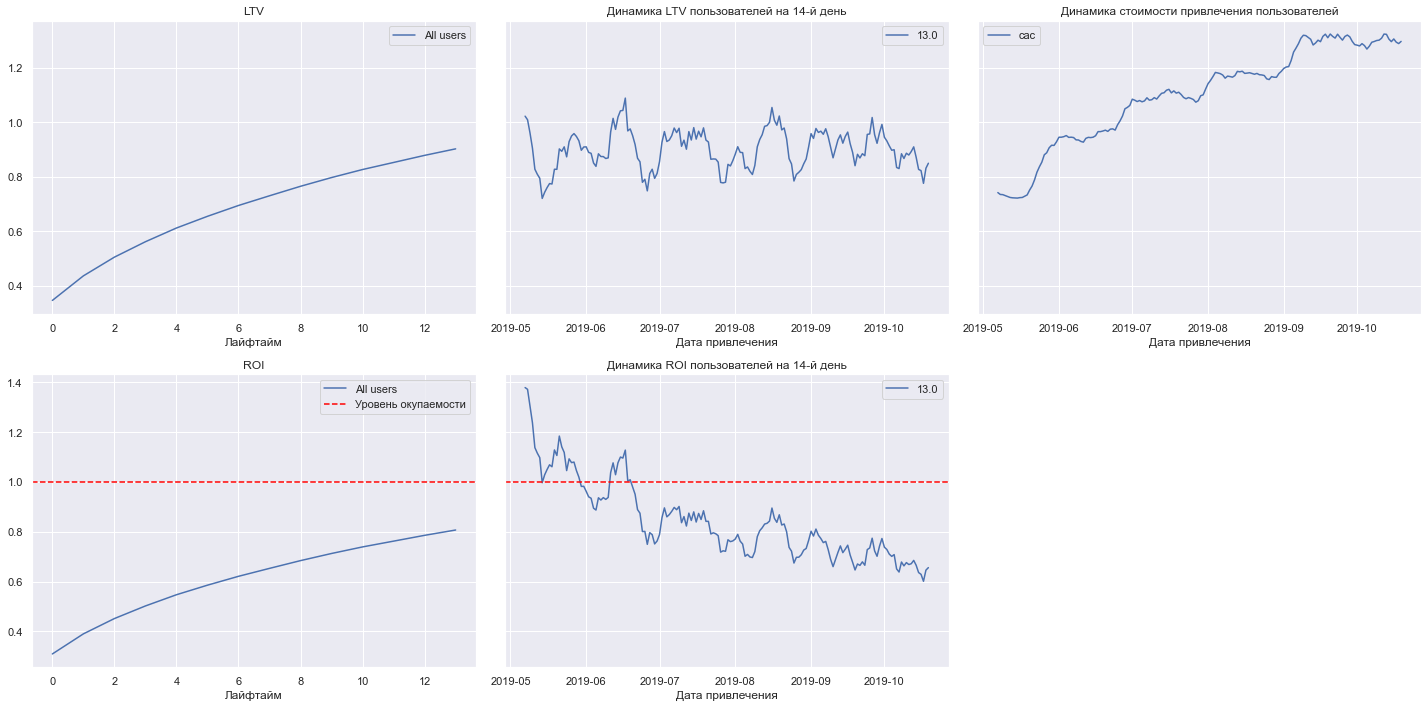

In [62]:
# profiles_not_organic
profiles_not_organic = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Органический трафик сильно **улучшает** показатели.  
Поэтому для чистоты исследования **исключим** данные органического трафика в данных для анализа.

#### По графикам можно сделать такие выводы:
* Реклама не окупается. ROI в конце недели — чуть выше 80%.
* CAC стабильно увеличивается. Значит, эффективность рекламных кампаний падает.
* LTV +/- стабилен. Значит, дело не в ухудшении качества пользователей.
* Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — рекламным каналам, стране и устройству первого посещения.

#### Начнём с разбивки по рекламным каналам: передадим параметру dimensions столбец channel.

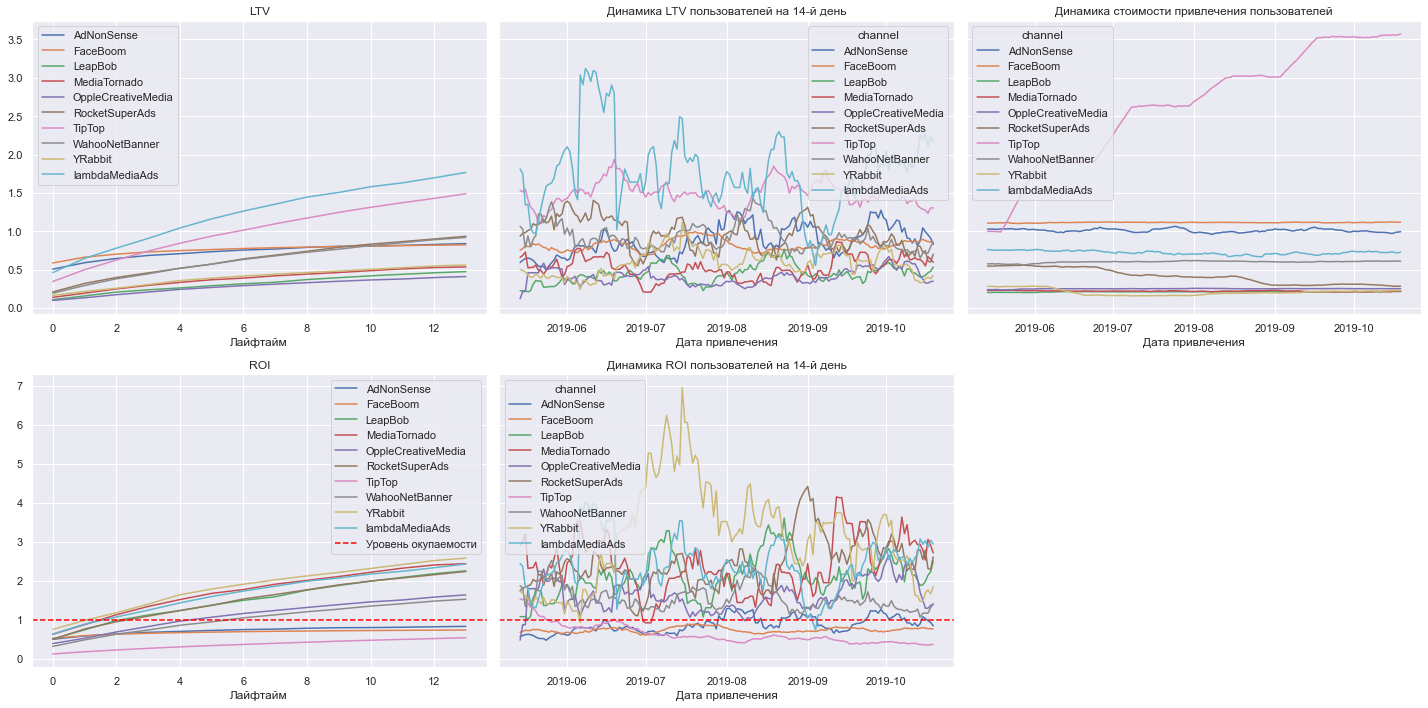

In [63]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**каша-малаша**  
Выведем данные двумя группами. По 5 штук.

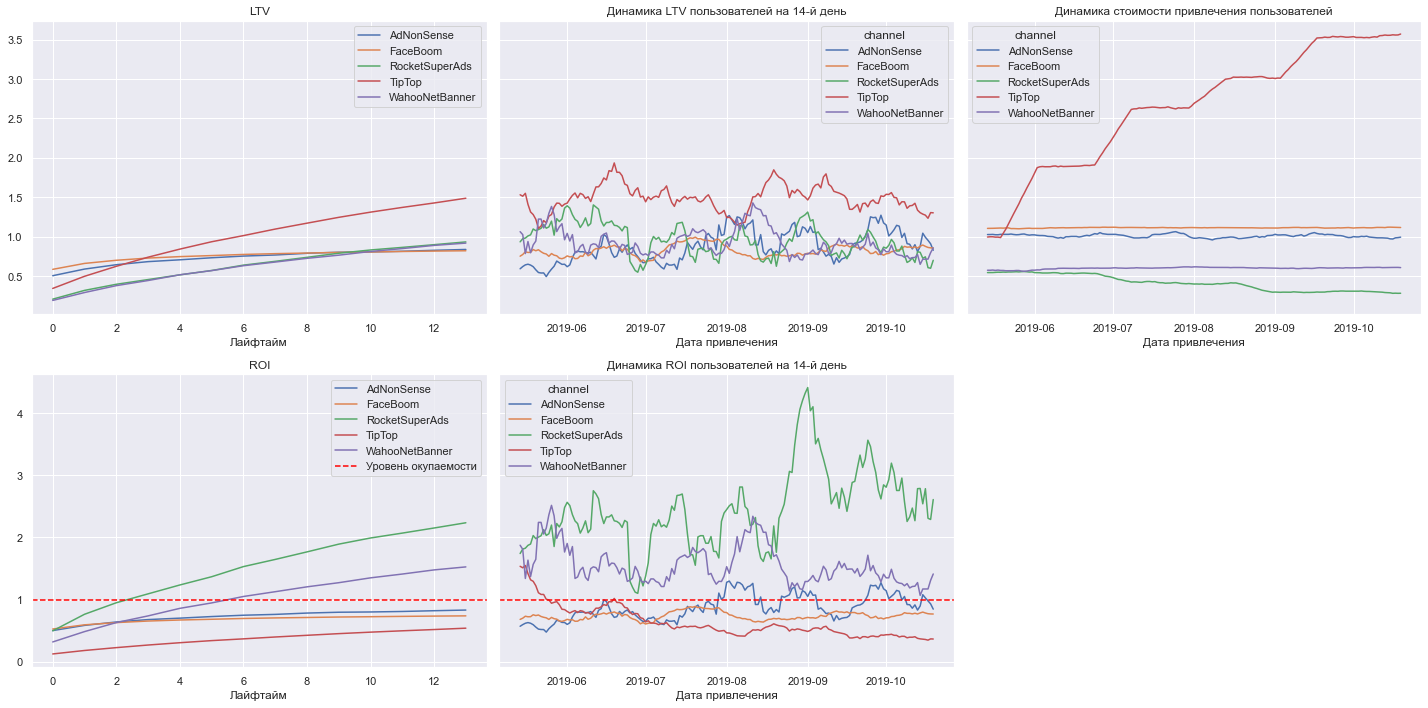

In [64]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

# каналы группа раз
channels_1 = ['FaceBoom', 'TipTop', 'WahooNetBanner', 'AdNonSense', 'RocketSuperAds']


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic.query('channel in @channels_1') , orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

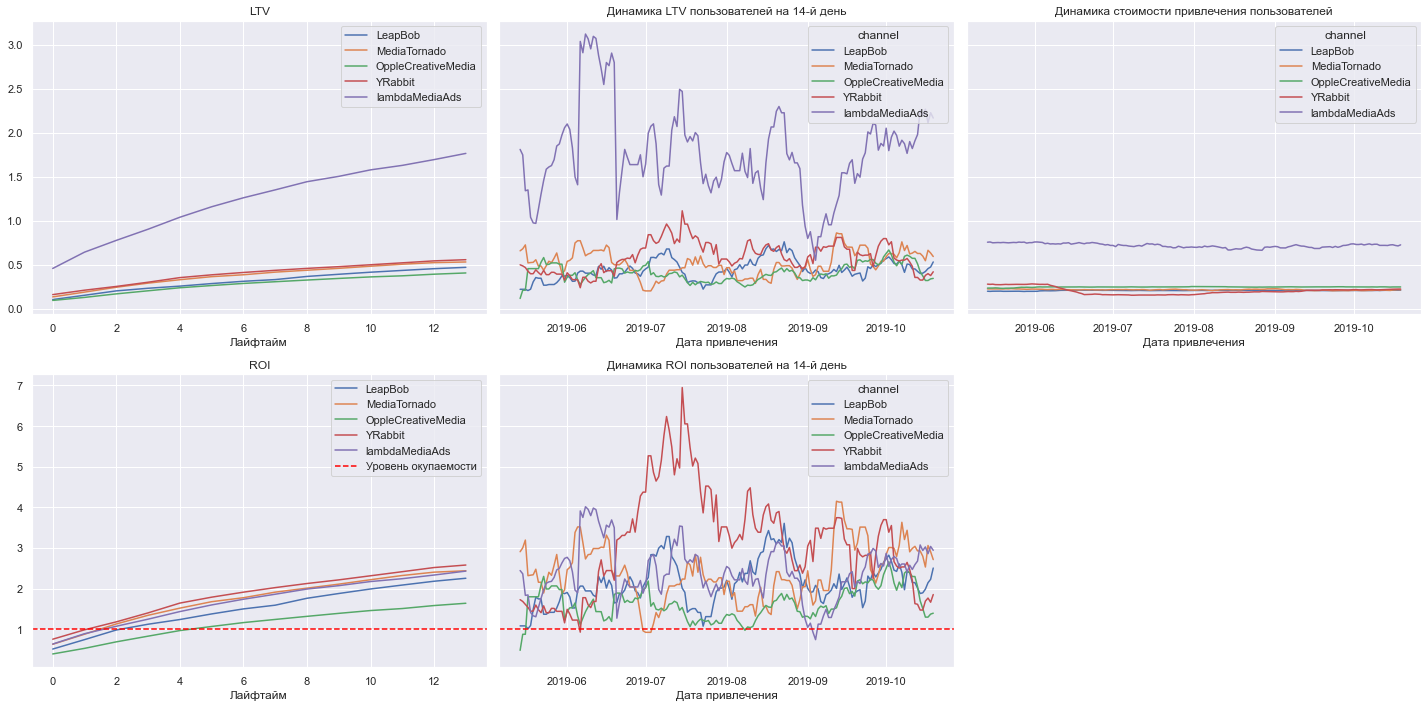

In [65]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

# каналы группа раз
channels_2 = ['LeapBob', 'OppleCreativeMedia', 'lambdaMediaAds', 'YRabbit', 'MediaTornado']


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic.query('channel in @channels_2') , orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

а теперь - два самых хитовых канала  
FaceBoom и TipTop

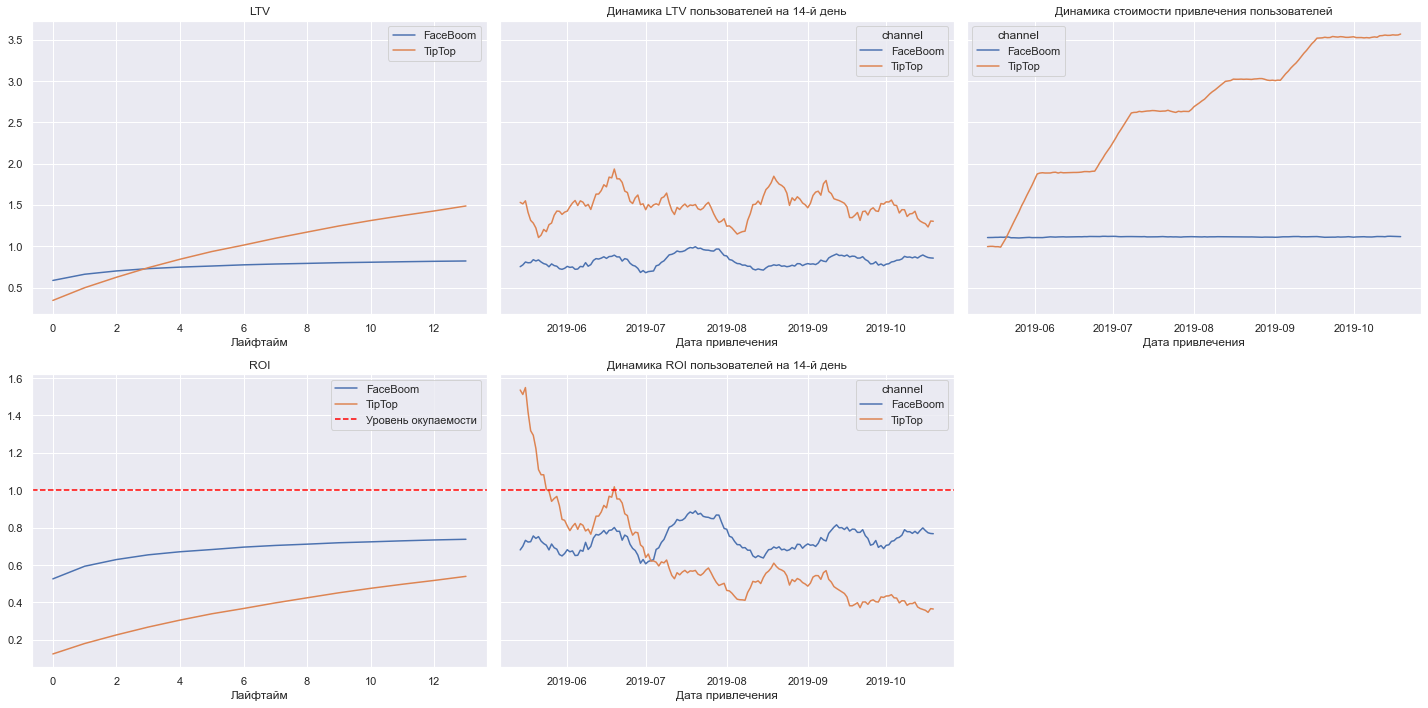

In [66]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

# каналы группа раз
channels_3 = ['FaceBoom', 'TipTop']


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic.query('channel in @channels_3') , orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

##### Вывод промежуточный по рекламным каналам:
* TipTop  
    самый большой объём вливаний  
    хорошая конверсия в покупателей  
    окупаемость **низкая**, около 0,5  
    окупаемость **снижается** в течении отчётного периода  
    стоимость привлечения **растёт** с огромной скоротью  
    LTV приэтом растёт и стабилен на 14й день
* FaceBoom  
    стабильные показатели жизни пользователей и стоимости их привлечения  
    стабильные показатели по времени  
    окупаемость **низкая** до 0,8

* WahooNetBanner  
    стабильная стоимость привлечения пользователей  
    окупаемость **более 1,5**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    
* AdNonSense  
    стабильная стоимость привлечения пользователей  
    окупаемость **отрицательная**  
    с течением времени окупаемость нестабильна, то положительная, то отрицательная  
    
* OppleCreativeMedia  
    стабильная стоимость привлечения пользователей  
    окупаемость **более 1,5**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    
* RocketSuperAds  
    стоимость привлечения пользователей  ** снижается**   
    с течением времени  
    
    окупаемость **более 2**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    
* LeapBob  
    стоимость привлечения пользователей  ** снижается**   
    с течением времени  
    
    окупаемость **более 2**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    
* lambdaMediaAds  
    стоимость привлечения пользователей  ** снижается**   
    с течением времени  
    
    окупаемость **более 2**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    
* MediaTornado  
    стоимость привлечения пользователей  ** снижается**   
    с течением времени  
    
    окупаемость **более 2**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    
* YRabbit  
    стоимость привлечения пользователей  ** снижается**   
    с течением времени  
    
    окупаемость **более 2**  
    с течением времени окупаемость нестабильна, но всегда **положительная**  
    

#### По странам: передадим параметру dimensions столбец region.

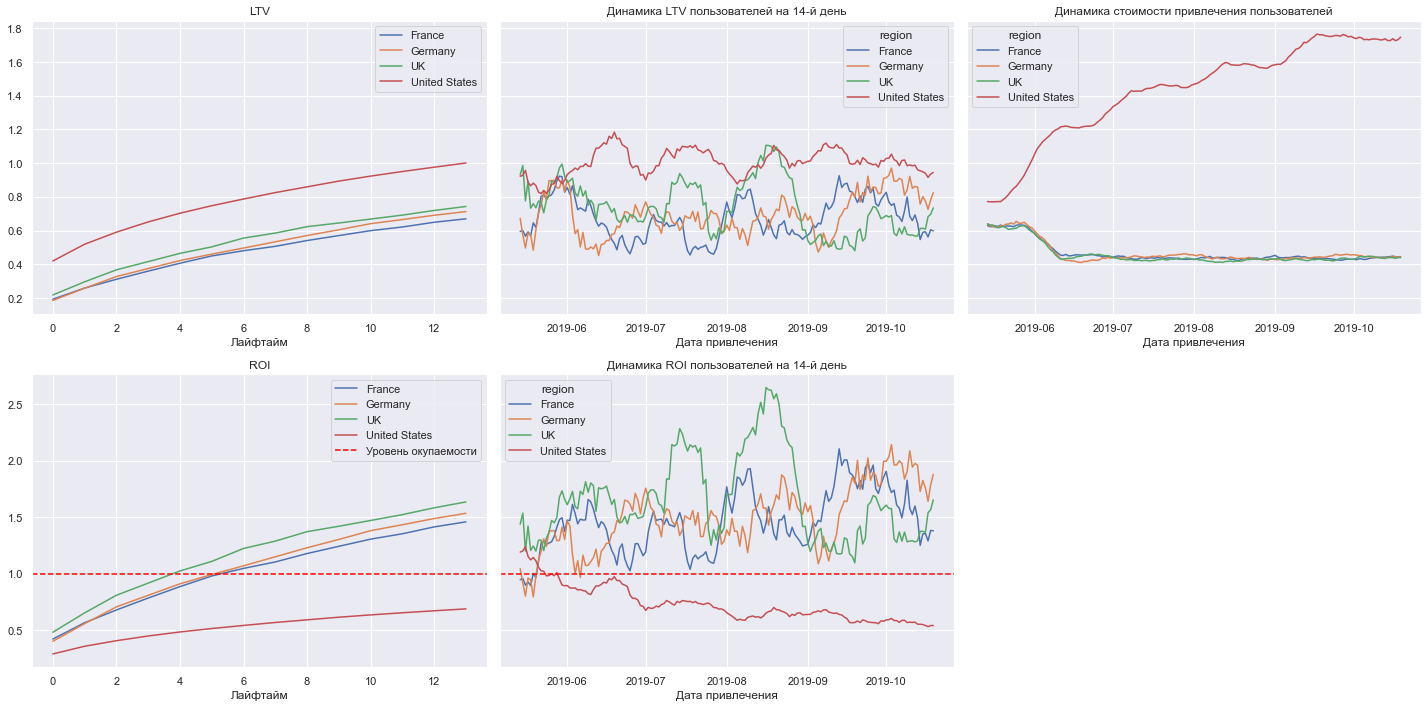

In [67]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

##### United States - портит всю картину
* рост расходов и стоимости привлечения со временем  
* падение окупаемости со временем  
* отрицательная окупаемость

#### Перейдём к устройствам.

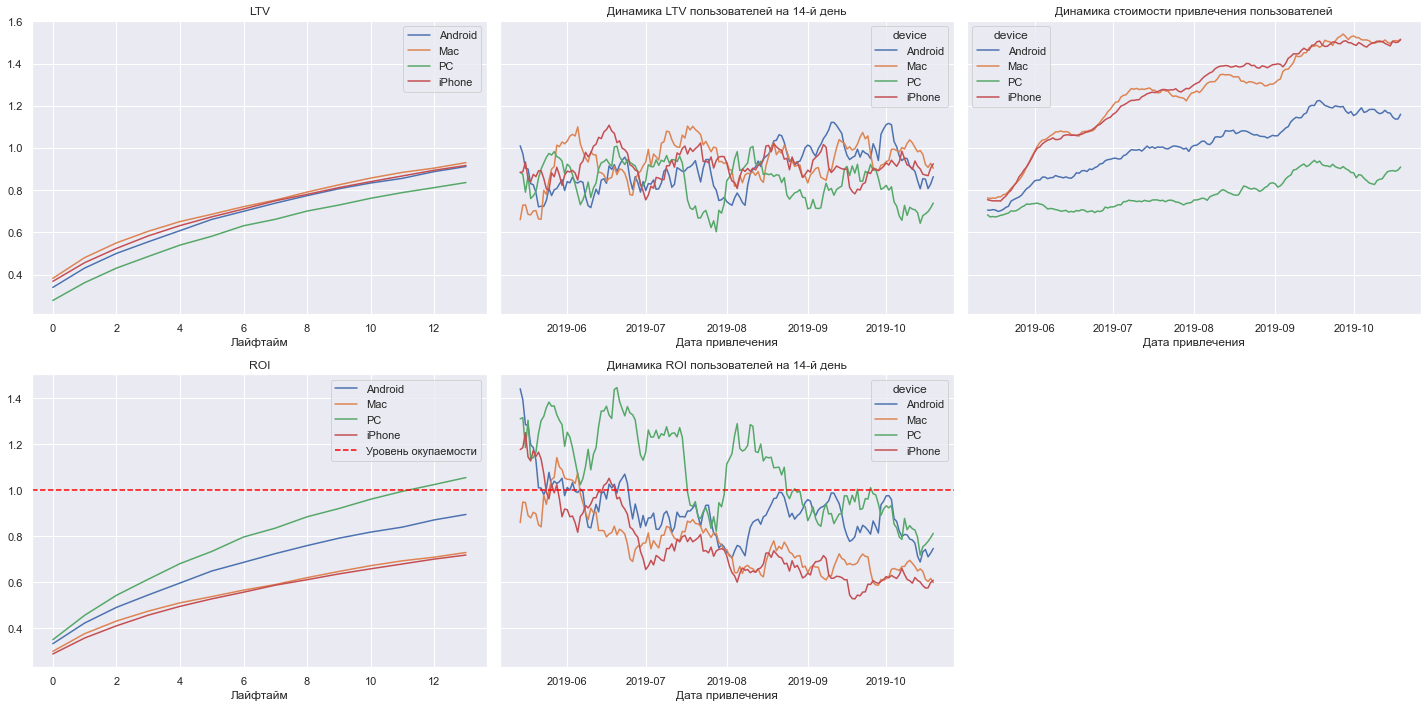

In [68]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

##### PC - лидер по показателям
**Android** идёт за ними, но не достигает окупаемости всё равно  
* iPhone и Mac идут вровень, но **очень плохо**, что очень странно, ведь считается, что эта аудитория наиболее **платёжеспособна и лояльна к платным услугам и товарам**

#### Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

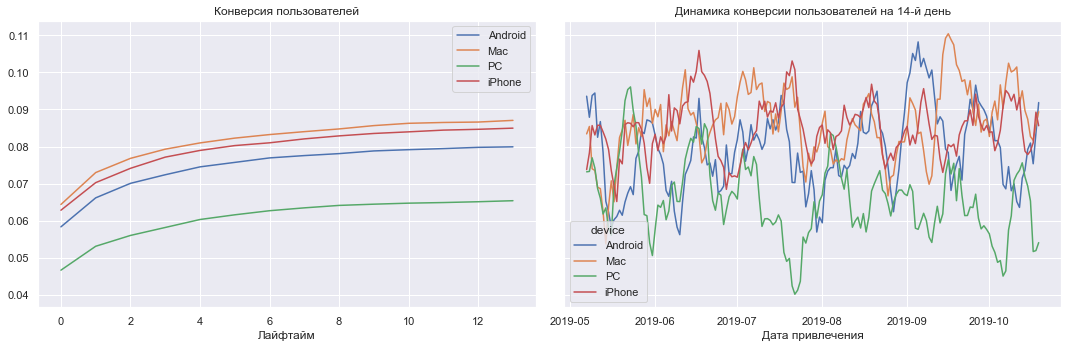

In [69]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

##### Судя по графикам, пользователи iPhone и Mac конвертируются очень хорошо, причём постоянно.

Видимо, дело в удержании. .

#### Вывод по окупаемости рекламы  
* **страны** - проблемная страна **United States**
* **каналы** - проблемные каналы 
    * * TipTop
    * * FaceBoom 

Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

#### Удержание по устройствам

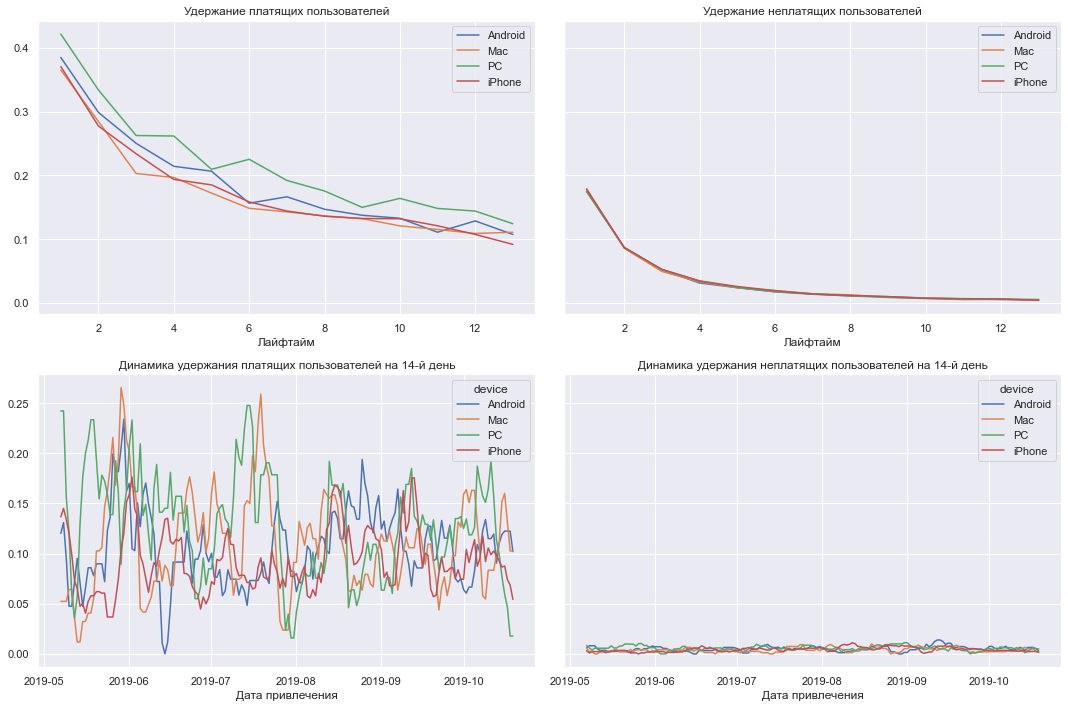

In [70]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### Удержание пользователей всех платформ примерно схоже  


#### Удержание по рекламным каналам

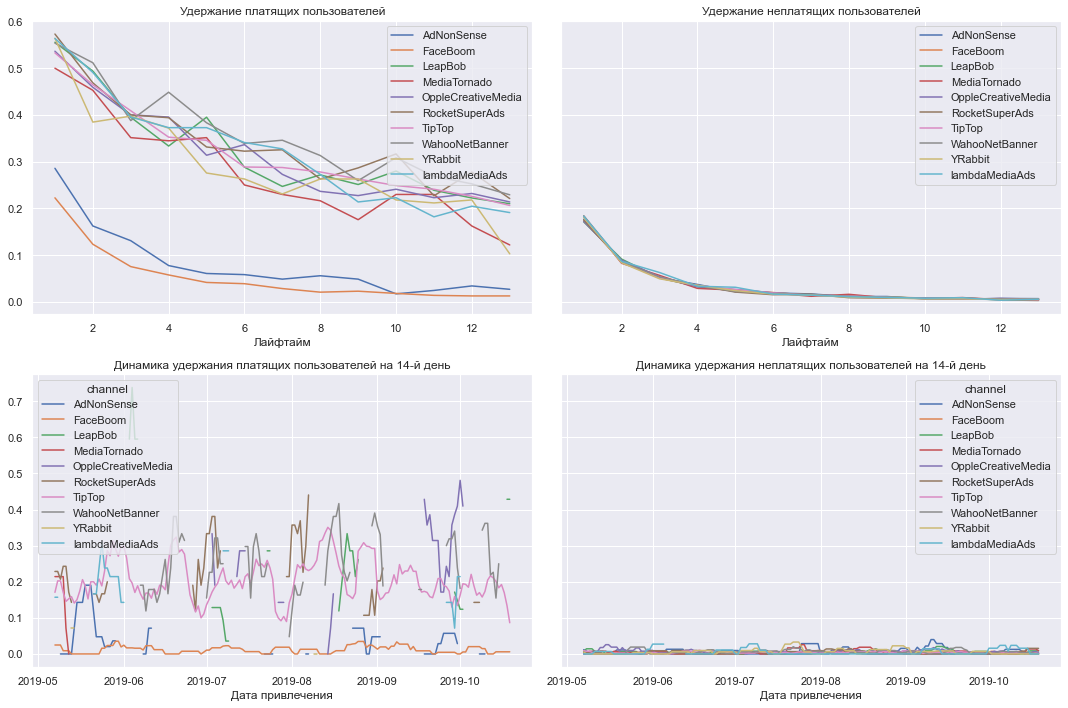

In [71]:
# смотрим удержание с разбивкой по рекламным каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### Проблемное удержание пользователей  
* AdNonSense
* FaceBoom   
  
  
**удержание канала TipTop хорошее**

#### Удержание по странам

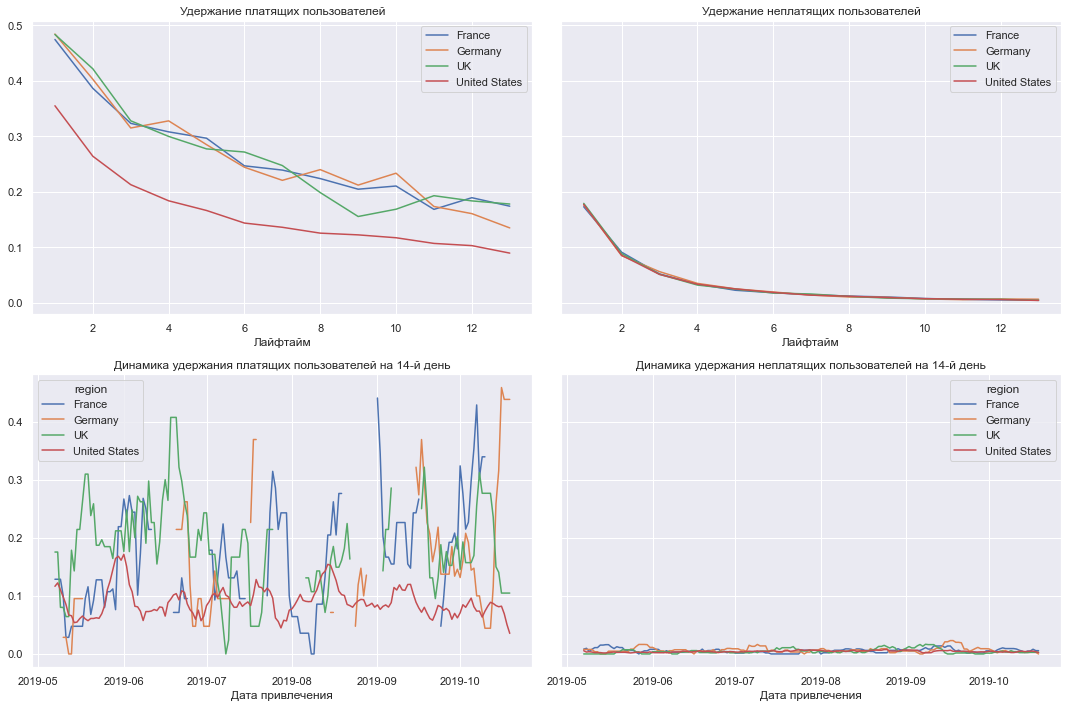

In [72]:
# смотрим удержание с разбивкой по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### United States - отстают от других стран

#### итог  
  
##### Реклама в целом **не** окупается  
##### Провальные моменты  
* Страна - аутсайдер - **United States**  
* Провальные рекламные каналы - **FaceBoom** и **TipTop**    
  
##### Возможные причины  
* рекламные кампании построены **без учёта особенностей** пользователей страны **United States** и каналов **FaceBoom** и **TipTop**  
  
##### Стратегия выхода на окупаемость  
* **отключить** рекламу в **United States** и в каналах **FaceBoom** и **TipTop**
* изучить особенности пользователей в **United States** и в каналах **FaceBoom** и **TipTop**  
* (пригласить к сотрудничеству специалистов по **United States** и каналам **FaceBoom** и **TipTop**)
* запустить в тестовом режиме обновлённые рекламные кампании в **United States** и в каналах **FaceBoom** и **TipTop**  
* проверить результаты


## Вывод

* Реклама в целом не окупается

### Тянут вниз

* United States
* FaceBoom
* TipTop

### Драйверы успеха

Рекламные каналы  
* RocketSuperAds
* LeapBob
* lambdaMediaAds
* MediaTornado
* YRabbit  
  
Платформы  
* PC
* Android

### Рекомендации по исправлению ситуации

* **отключить** рекламу в **United States** и в каналах **FaceBoom** и **TipTop**
* изучить особенности пользователей в **United States** и в каналах **FaceBoom** и **TipTop**  
* (пригласить к сотрудничеству специалистов по **United States** и каналам **FaceBoom** и **TipTop**)
* **запустить в тестовом режиме** обновлённые рекламные кампании в **United States** и в каналах **FaceBoom** и **TipTop**  
* проверить результаты

[Анализ провёл Эдуард Дементьев](https://eddydewrussia.ru/category/%d0%b0%d0%bd%d0%b0%d0%bb%d0%b8%d0%b7-%d0%b4%d0%b0%d0%bd%d0%bd%d1%8b%d1%85/)